# TP06 Exercice 1
# $\pi$ par méthode de Monte Carlo avec Dask Array
## Implémentation Numpy

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sample = 100_000_000

In [3]:
%%time
xxyy = np.random.uniform(-1, 1, size=(2, sample))

CPU times: user 796 ms, sys: 153 ms, total: 949 ms
Wall time: 953 ms


In [4]:
xxyy

array([[ 0.32822563,  0.0911697 ,  0.91844052, ...,  0.64796923,
         0.71315331, -0.31987184],
       [ 0.50725237,  0.56155372,  0.6313649 , ..., -0.42962767,
         0.43375478, -0.73864083]], shape=(2, 100000000))

In [5]:
xxyy.shape

(2, 100000000)

In [6]:
xxyy.nbytes

1600000000

In [7]:
%%time
norm = np.linalg.norm(xxyy, axis=0)
summ = np.sum(norm <= 1)
pi = 4 * summ / sample

CPU times: user 428 ms, sys: 556 ms, total: 984 ms
Wall time: 983 ms


In [8]:
print("pi ~= {}".format(pi))

pi ~= 3.1415718


## Implémentation Dask

In [9]:
import dask.array as da

In [10]:
%%time
xxyy_da = da.random.uniform(-1, 1, size=(2, sample))

CPU times: user 1.27 ms, sys: 259 μs, total: 1.53 ms
Wall time: 1.35 ms


In [11]:
xxyy_da

dask.array<uniform, shape=(2, 100000000), dtype=float64, chunksize=(2, 8388608), chunktype=numpy.ndarray>

In [13]:
%%time
norm_da = da.linalg.norm(xxyy_da, axis=0)
summ_da = da.sum(norm_da <= 1)
pi_da = 4 * summ_da / sample

CPU times: user 4.86 ms, sys: 0 ns, total: 4.86 ms
Wall time: 4.78 ms


In [14]:
%%time
print("pi ~= {}".format(pi_da.compute()))

pi ~= 3.1414728
CPU times: user 5.64 s, sys: 2.2 s, total: 7.84 s
Wall time: 783 ms


<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    We can observe that the execution time for planing the calculation of pi is much lower with Dask than Numpy, but the time to compute the result is very close for both methods.
  </p>
</div>

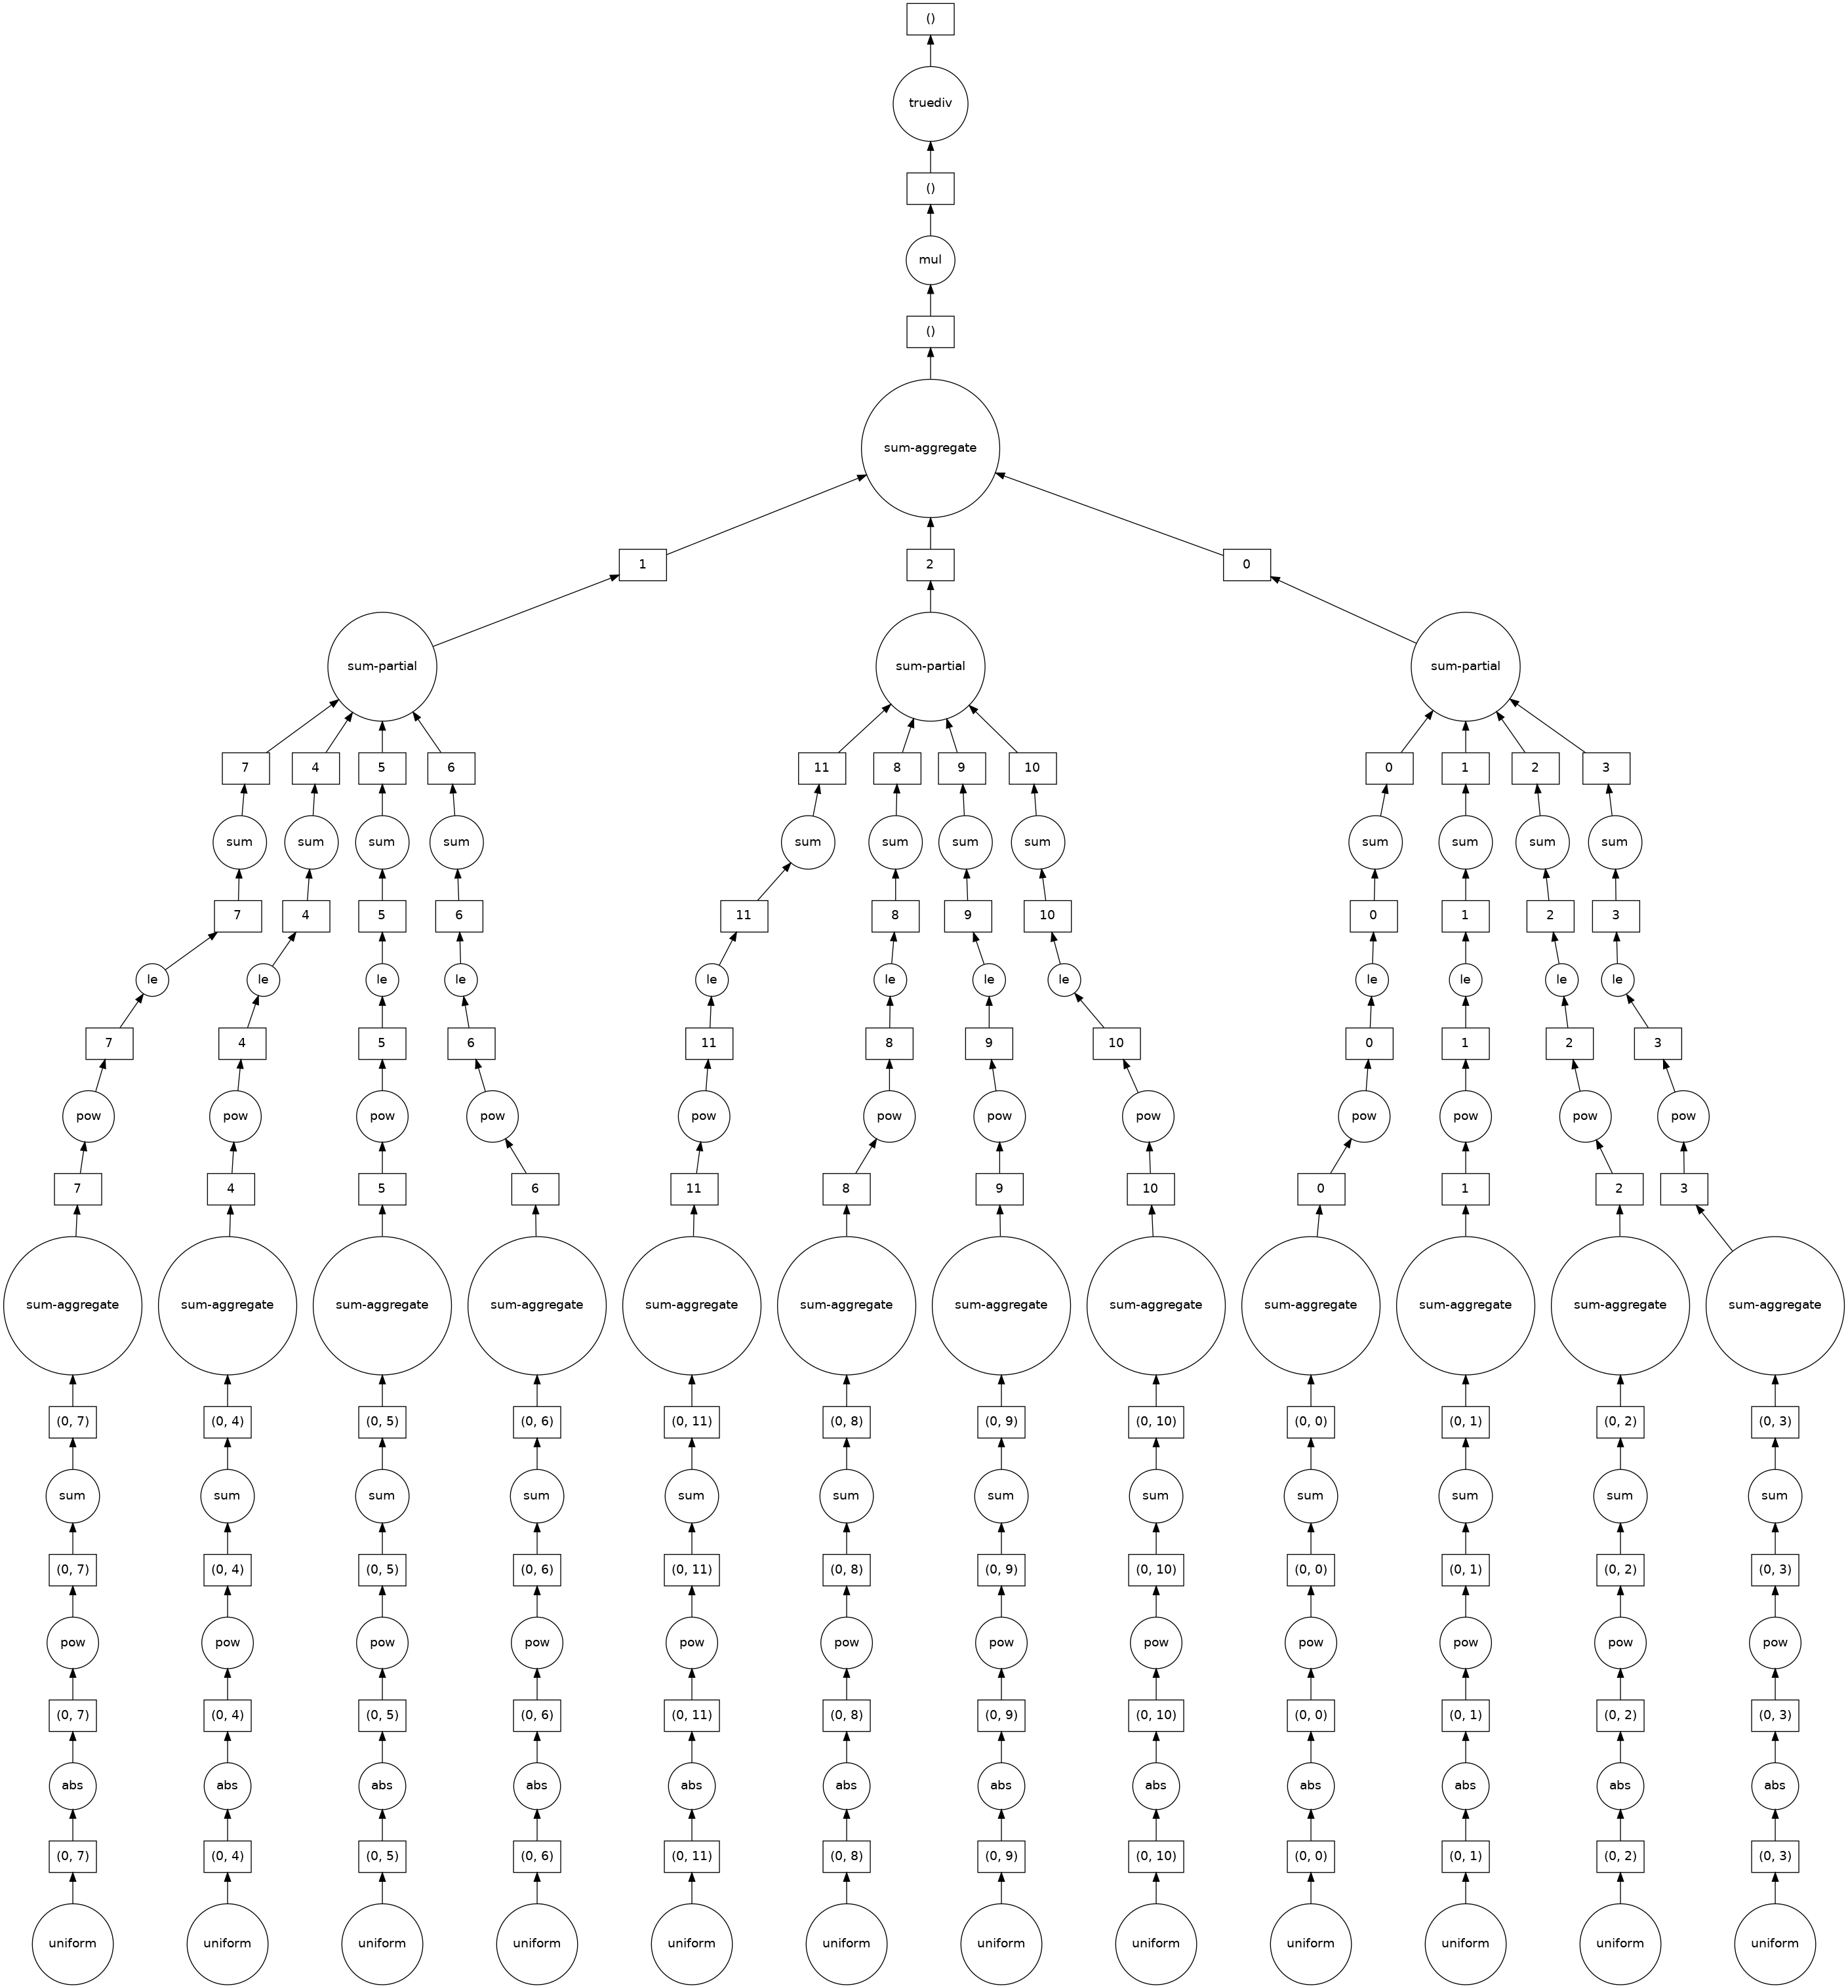

In [22]:
pi_da.visualize()

## Augmenter le nombre de tirs.

In [ ]:
n_samples = [1_000_000, 10_000_000, 15_000_000, 25_000_000, 50_000_000, 100_000_000]
np_times = []

for s in n_samples:
    tic = time.time()
    xxyy = np.random.uniform(-1, 1, size=(2, s))
    norm = np.linalg.norm(xxyy, axis=0)
    summ = np.sum(norm <= 1)
    pi = 4 * summ / s
    print(f"pi ~= {format(pi)} for {s} samples")
    toc = time.time()
    np_times.append(toc-tic)

In [15]:
da_times = []

for s in n_samples:
    tic = time.time()
    xxyy_da = da.random.uniform(-1, 1, size=(2, s))
    norm_da = da.linalg.norm(xxyy_da, axis=0)
    summ_da = da.sum(norm_da <= 1)
    pi_da = 4 * summ_da / s
    print(f"pi ~= {format(pi_da.compute())} for {s} samples")
    toc = time.time()
    da_times.append(toc-tic)

pi ~= 3.141952 for 1000000 samples
pi ~= 3.1411004 for 10000000 samples
pi ~= 3.141545333333333 for 15000000 samples
pi ~= 3.1419 for 25000000 samples
pi ~= 3.14161208 for 50000000 samples
pi ~= 3.14174436 for 100000000 samples


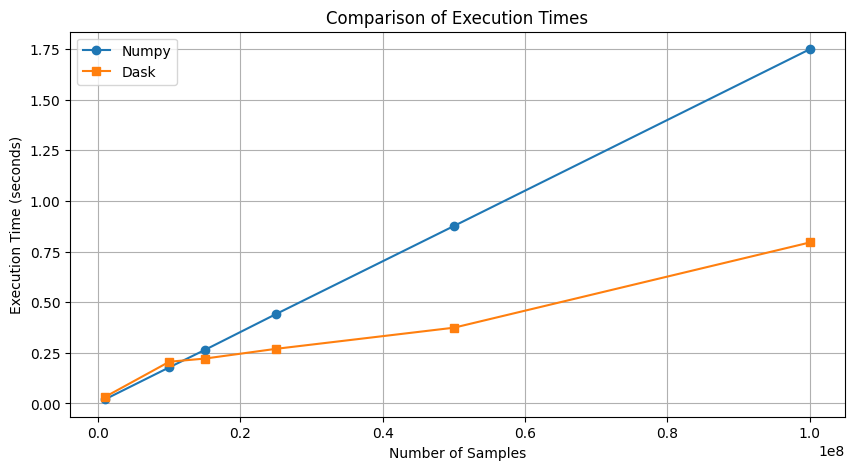

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(n_samples, np_times, label='Numpy', marker='o')
plt.plot(n_samples, da_times, label='Dask', marker='s')
plt.xlabel('Number of Samples')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times')
plt.legend()
plt.grid()
plt.show()

<div style="background-color:#f0f8ff; color:#333333; padding:10px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    We can see that the execution time for arrays up to 100_000_000 is very close for both libraries, but it is clear that Dask performs better than Numpy when working with larger arrays. Dask can work with larger arrays more easily because it is designed to operate in parallel and distributing work across multiple processors without calculating the result of every step. The number pi is truly calculated only at the last step.
  </p>
</div>